In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set(style = 'darkgrid')

In [3]:
df = pd.read_csv('./Mall_Customers.csv')
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.rename(columns = {'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending'}, inplace = True)

In [5]:
X = df[['Income', 'Spending']].values

Text(0, 0.5, 'Number of Clusters')

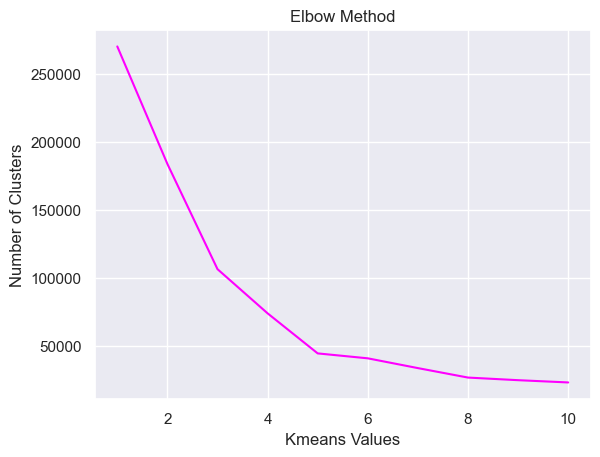

In [6]:
sns.lineplot(x = np.arange(1, 11), y = [KMeans(a, n_init = 'auto', random_state = 42).fit(X).inertia_ for a in range(1, 11)], color = 'fuchsia')

plt.title('Elbow Method')
plt.xlabel('Kmeans Values')
plt.ylabel('Number of Clusters')

In [7]:
df['KMeans'] = KMeans(5, n_init = 'auto', random_state = 42).fit_predict(X) + 1

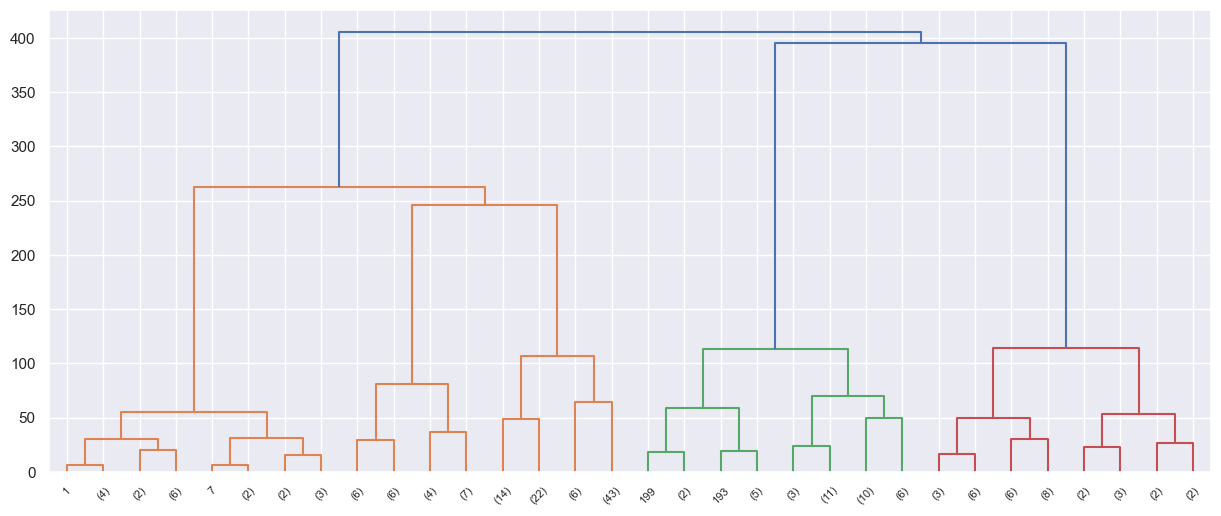

In [29]:
plt.figure(figsize = (15, 6))
dendrogram(linkage(df[['Income', 'Spending']], 'ward'), truncate_mode = 'level', p = 4)
plt.show()

In [9]:
df['Agglomerative'] = AgglomerativeClustering(5, metric = 'euclidean').fit_predict(X) + 1

c:\Users\townsend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
plt.figure(figsize = (7, 7))
px.scatter(df, 'Income', 'Spending', 'KMeans',
color_continuous_scale = 'viridis', size = 'KMeans')

<Figure size 700x700 with 0 Axes>

In [11]:
plt.figure(figsize = (7, 7))
px.scatter(df, 'Income', 'Spending', 'Agglomerative',
color_continuous_scale = 'viridis', size = 'Agglomerative')

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='Income', ylabel='Spending'>

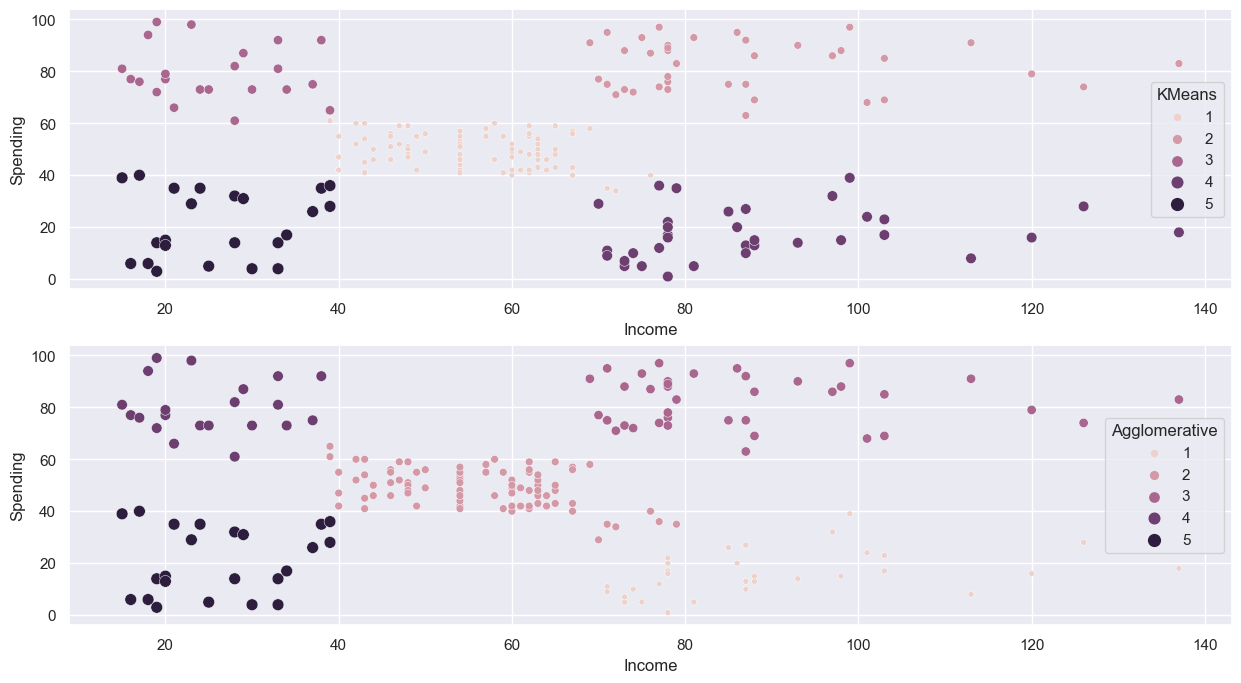

In [24]:
fig, ax = plt.subplots(2, 1, figsize = (15, 8))
sns.scatterplot(df, x = 'Income', y = 'Spending', ax = ax[0], hue = 'KMeans', size = 'KMeans')
sns.scatterplot(df, x = 'Income', y = 'Spending', ax = ax[1], hue = 'Agglomerative', size = 'Agglomerative')